# Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys

In [3]:
# connect to mysql database
import mysql.connector
mydb = mysql.connector.connect(
    host="localhost",
    user="root",
    passwd="",
    database="halofilkom_db"
)

# make cursor
mycursor = mydb.cursor()

In [4]:
# get all date from ost_thread_entry table
mycursor.execute("SELECT created FROM ost_thread_entry WHERE recipients is NULL")
listOfDate = mycursor.fetchall()                                                                                

In [5]:
listOfDate = [x[0].strftime("%Y-%m") for x in listOfDate]

# EDA

## Time series analisys

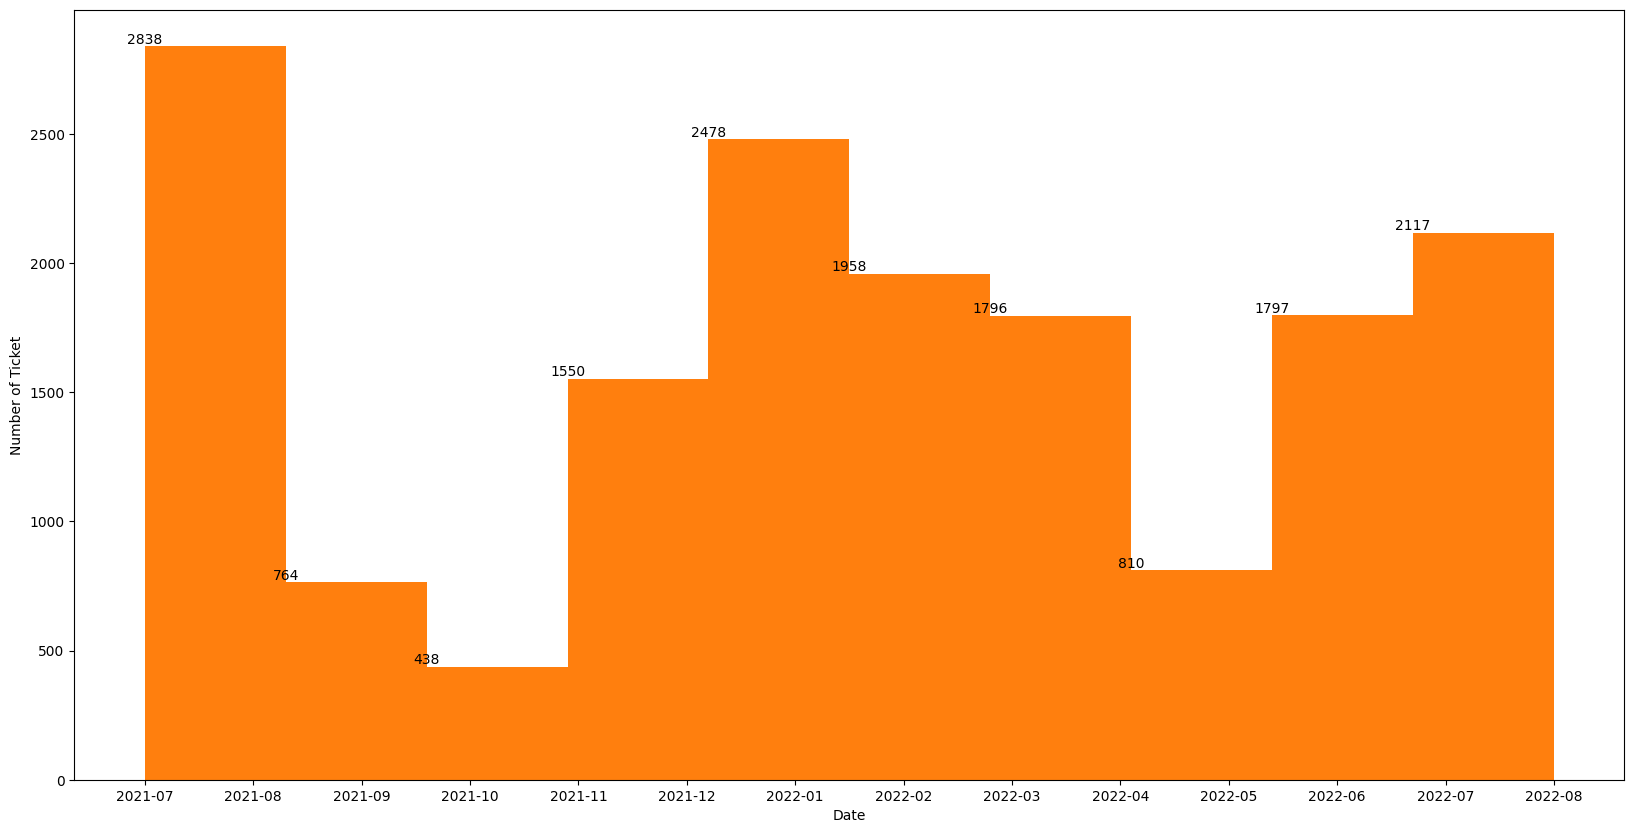

In [6]:
# make graph of list of date
plt.figure(figsize=(20,10))
plt.hist(listOfDate)
# add value label
for i in range(len(plt.hist(listOfDate)[0])):
    plt.text(plt.hist(listOfDate)[1][i], plt.hist(listOfDate)[0][i], str(int(plt.hist(listOfDate)[0][i])), ha='center', va='bottom')
plt.xlabel("Date")
plt.ylabel("Number of Ticket")
plt.show()


In [7]:
sql = "SELECT title, response FROM ost_canned_response WHERE isenabled = 1"
mycursor.execute(sql)
myresult = mycursor.fetchall()

In [8]:
topicList = [topic for topic, response in myresult]

In [9]:
unitList = []
for topic in topicList:
    if("akademikt" in topic.lower()):
        unitList.append("Akademik")
    elif("keuangan" in topic.lower()):
        unitList.append("Keuangan")
    elif("kemahasiswaan" in topic.lower()):
        unitList.append("Kemahasiswaan")
    else:
        unitList.append("Lainnya")

Text(0, 0.5, 'Number of Ticket')

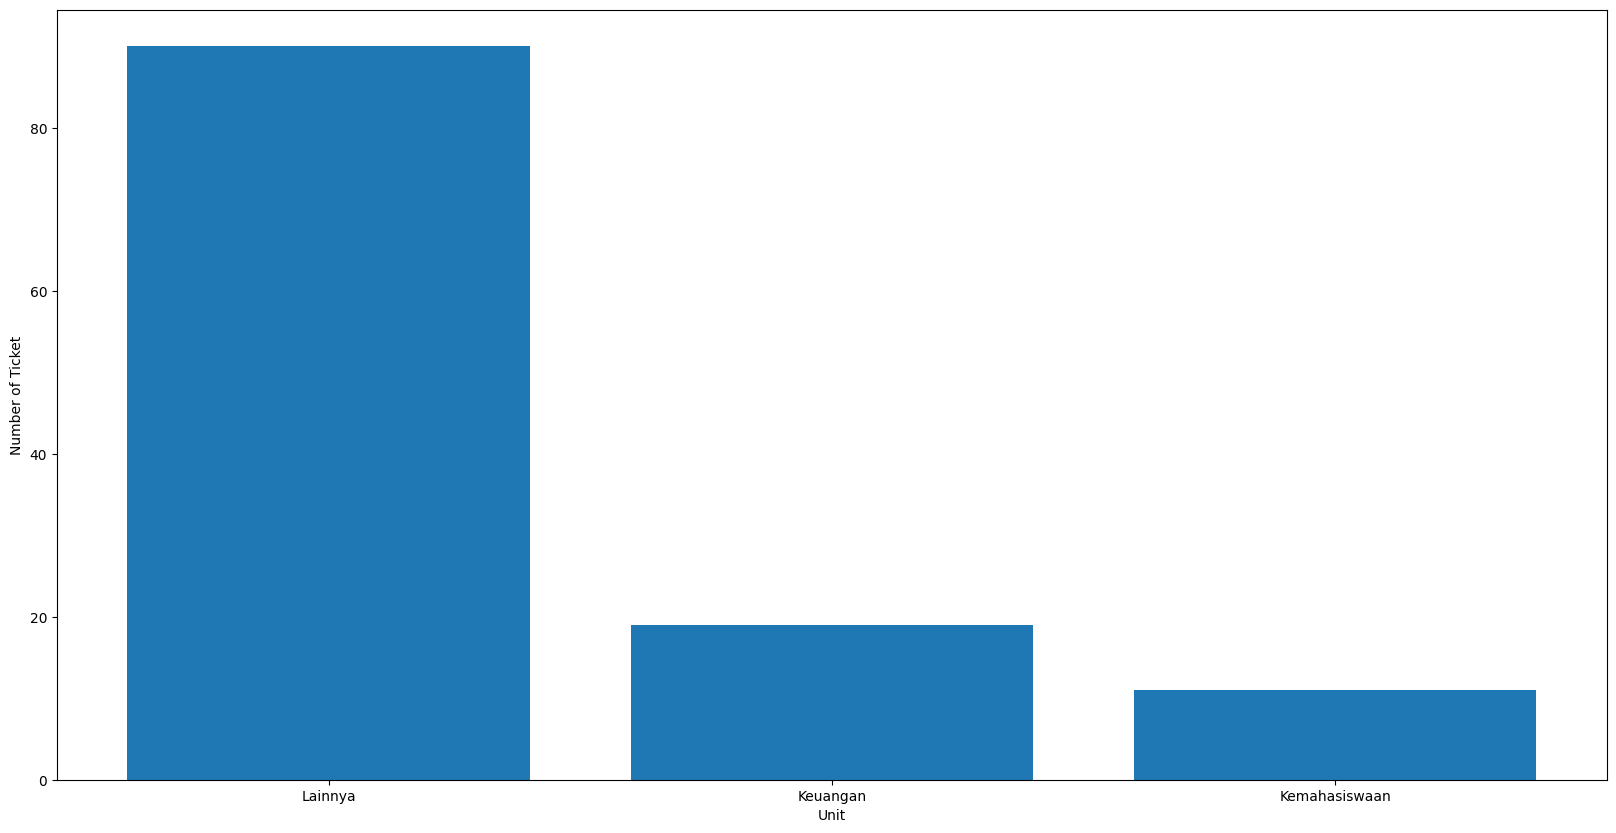

In [10]:
# group unitlist by count
unitList = pd.Series(unitList)
unitList = unitList.value_counts()
# make graph of unit list
plt.figure(figsize=(20,10))
plt.bar(unitList.index, unitList.values)

plt.xlabel("Unit")
plt.ylabel("Number of Ticket")

In [11]:
import pandas as pd

patternsDataframe = pd.DataFrame()
patternsDataframe["tag"] = []
patternsDataframe["patternQ"] = []

In [ ]:
intents = "intents_terpaling_baru.json"
# import data from intents
import json
with open(intents) as json_data:
    intents = json.load(json_data)

# get all intent
intentList = []
for intent in intents["intents"]:
    theTag = intent["tag"]
    for pattern in intent["patterns"]:
        patternsDataframe = patternsDataframe.append({"tag": theTag, "patternQ": pattern}, ignore_index=True)


In [13]:
patternsDataframe

tag                                           patternQ
0     pengajuan_bantuan  hasil seleksi mandiri alih seleksi potong biay...
1     pengajuan_bantuan              ubah ukt bantu uang siam nominal ubah
2     pengajuan_bantuan                                izin alur bantu ukt
3     pengajuan_bantuan  bantu ukt ubah kelompok ukt balas bantu ukt uk...
4     pengajuan_bantuan  izin prosedur urus prestasi coba akses dokumen...
...                 ...                                                ...
1593             sapaan                                              salam
1594            penutup                                       terima kasih
1595            penutup                                           menjawab
1596            penutup                                     sudah menjawab
1597            penutup                                              cukup

[1598 rows x 2 columns]

In [14]:
df_grouped = patternsDataframe.groupby("tag").agg(lambda x: ' '.join(x))
df_grouped.head(10)

patternQ
tag                                                                                       
alur_pasca_ujian_skripsi                 dokumen uji dokumen dokumen salah lembar tanda...
angsur_sap                               angsur biaya didik sap alur urus daftar ulang ...
banding_ukt_mahasiswa                    banding ukt tanggal hasil akses izin buka turu...
bantuan_ukt                              ringan ukt prosedur bantu angsur ukt bank kond...
bantuan_ukt_dan_ukt_kemendikbud_ristek   izin alur bantu ukt ambil mata kait biaya ukt ...
bebas_pustaka_ub                         bebas pustaka urus teknik komputer kait surat ...
bebas_tanggungan_laboratorium_filkom_ub                         nama sap izin contoh bebas
cara_daftar_bantuan_kemendikbud_ristek         izin kena surat lihat izin kena surat lihat
cek_siam_untuk_tagihan                   ilmu komputer bantu bayar uang ukt biaya kemba...
daftar_ulang                             salah calon izin angsur batas daftar ulang ala...

In [23]:
# Creating Document Term Matrix
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
X = cv.fit_transform(df_grouped["patternQ"])

df_dtm = pd.DataFrame(X.toarray(), columns=cv.get_feature_names())
df_dtm.index = df_grouped.index

In [25]:
df_dtm.head(10)

abar  abdi  acara  aceh  ad  adik  \
tag                                                                          
alur_pasca_ujian_skripsi                    0     0      0     0   0     0   
angsur_sap                                  0     0      0     0   0     0   
banding_ukt_mahasiswa                       0     0      0     0   0     0   
bantuan_ukt                                 0     0      0     0   0     0   
bantuan_ukt_dan_ukt_kemendikbud_ristek      0     0      0     0   0     0   
bebas_pustaka_ub                            0     0      0     0   0     0   
bebas_tanggungan_laboratorium_filkom_ub     0     0      0     0   0     0   
cara_daftar_bantuan_kemendikbud_ristek      0     0      0     0   0     0   
cek_siam_untuk_tagihan                      0     0      0     0   0     0   
daftar_ulang                                0     0      0     0   0     0   

                                         adu  agama  ageng  agung  ...  \
tag                                                                ...   
alur_pasca_ujian_skripsi                   0      0      0      0  ...   
angsur_sap                                 0      0      0      0  ...   
banding_ukt_mahasiswa                      1      0      0      0  ...   
bantuan_ukt                                0      0      0      0  ...   
bantuan_ukt_dan_ukt_kemendikbud_ristek     0      0      0      0  ...   
bebas_pustaka_ub                           0      0      0      0  ...   
bebas_tanggungan_laboratorium_filkom_ub    0      0      0      0  ...   
cara_daftar_bantuan_kemendikbud_ristek     0      0      0      0  ...   
cek_siam_untuk_tagihan                     0      0      0      0  ...   
daftar_ulang                               0      4      0      0  ...   

                                         virtual  virus  visa  wajar  wajib  \
tag                                                                           
alur_pasca_ujian_skripsi                       0      0     0      0      0   
angsur_sap                                     0      0     0      0      0   
banding_ukt_mahasiswa                          0      0     0      0      0   
bantuan_ukt                                    0      0     0      0      0   
bantuan_ukt_dan_ukt_kemendikbud_ristek         0      0     0      0      0   
bebas_pustaka_ub                               0      0     0      0      0   
bebas_tanggungan_laboratorium_filkom_ub        0      0     0      0      0   
cara_daftar_bantuan_kemendikbud_ristek         0      0     0      0      0   
cek_siam_untuk_tagihan                         0      0     0      0      1   
daftar_ulang                                   0      0     0      0      1   

                                         wakil  wali  warna  web  zip  
tag                                                                    
alur_pasca_ujian_skripsi                     0     0      0    0    0  
angsur_sap                                   0     0      0    0    0  
banding_ukt_mahasiswa                        0     0      0    0    0  
bantuan_ukt                                  1     0      0    3    0  
bantuan_ukt_dan_ukt_kemendikbud_ristek       1     1      0    2    0  
bebas_pustaka_ub                             0     0      0    0    0  
bebas_tanggungan_laboratorium_filkom_ub      0     0      0    0    0  
cara_daftar_bantuan_kemendikbud_ristek       0     0      0    0    0  
cek_siam_untuk_tagihan                       3     3      0    0    0  
daftar_ulang                                 1     0      0    0    0  

[10 rows x 592 columns]

In [29]:
df_dtm.transpose().to_csv("df_dtm_intent.csv")

dokumen    3
lembar     1
salah      1
tanda      1
bijak      1
          ..
ilmu       0
imam       0
iman       0
indeks     0
zip        0
Name: alur_pasca_ujian_skripsi, Length: 592, dtype: int64


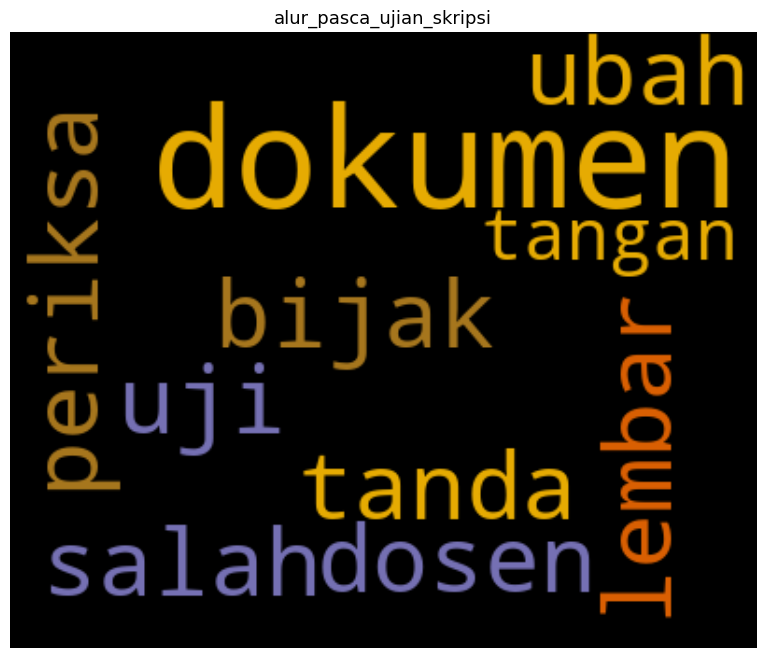

bayar      9
angsur     6
daftar     5
sap        5
program    4
          ..
ikan       0
ijazah     0
id         0
huruf      0
zip        0
Name: angsur_sap, Length: 592, dtype: int64


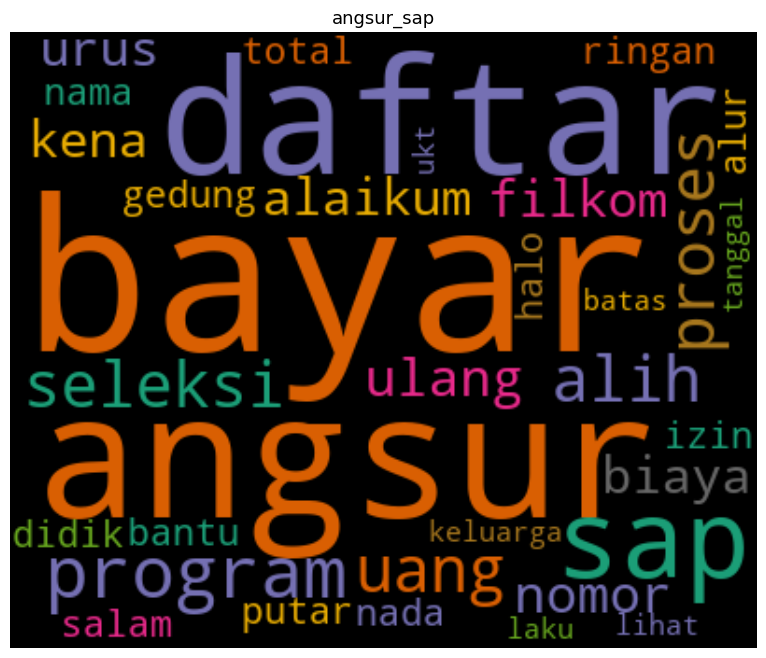

ukt        25
banding    14
angsur      9
bayar       8
turun       8
           ..
imam        0
ilmu        0
ilmiah      0
ikan        0
zip         0
Name: banding_ukt_mahasiswa, Length: 592, dtype: int64


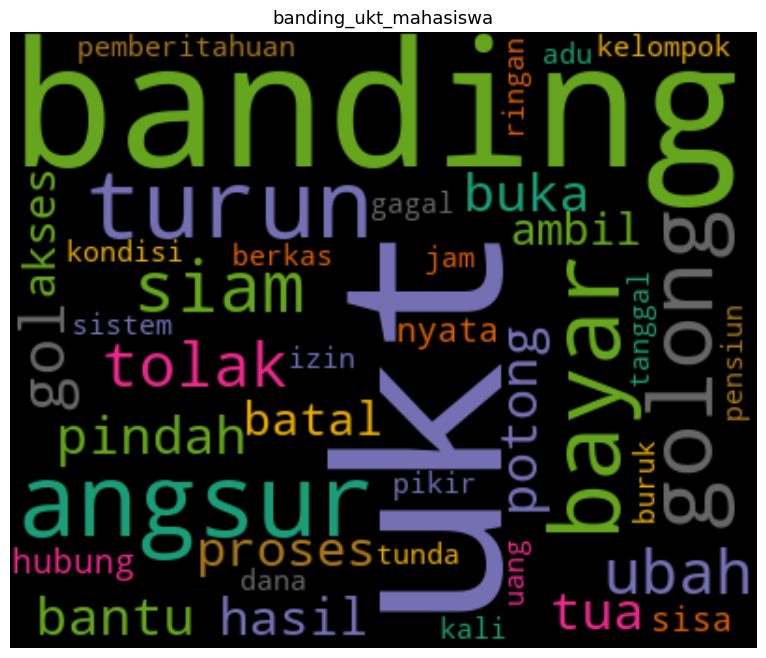

ukt              73
bantu            52
bayar            23
ringan           13
siam             11
                 ..
isya              0
inti              0
internasional     0
interaktif        0
zip               0
Name: bantuan_ukt, Length: 592, dtype: int64


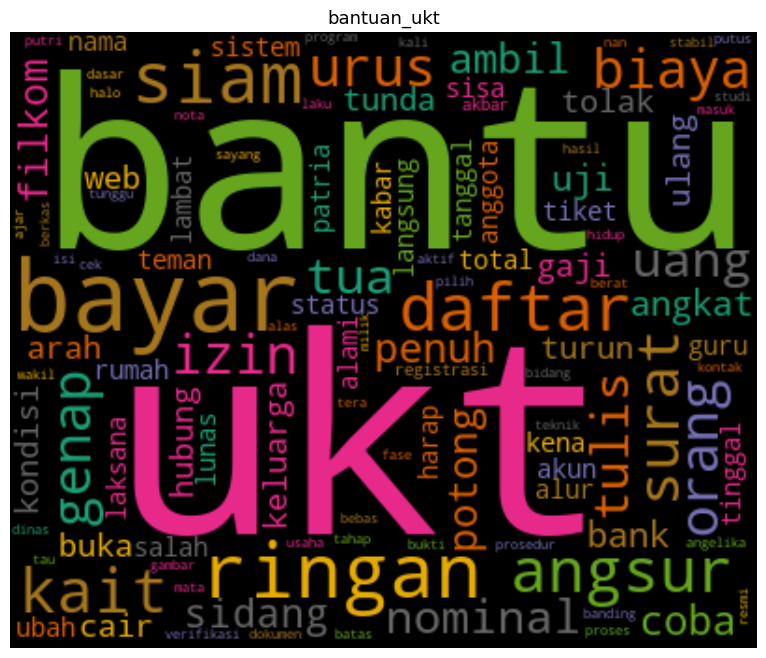

ukt              75
bantu            54
bayar            18
siam             14
kait             11
                 ..
insyaallah        0
insan             0
inggris           0
infrastruktur     0
zip               0
Name: bantuan_ukt_dan_ukt_kemendikbud_ristek, Length: 592, dtype: int64


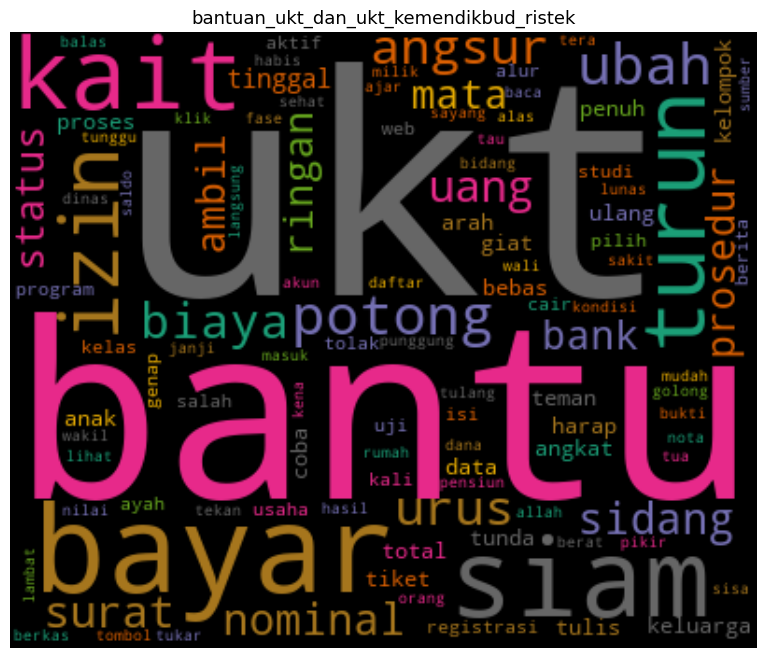

bebas      3
daftar     3
pustaka    2
angkat     2
kait       2
          ..
huruf      0
hindu      0
hilang     0
hijau      0
zip        0
Name: bebas_pustaka_ub, Length: 592, dtype: int64


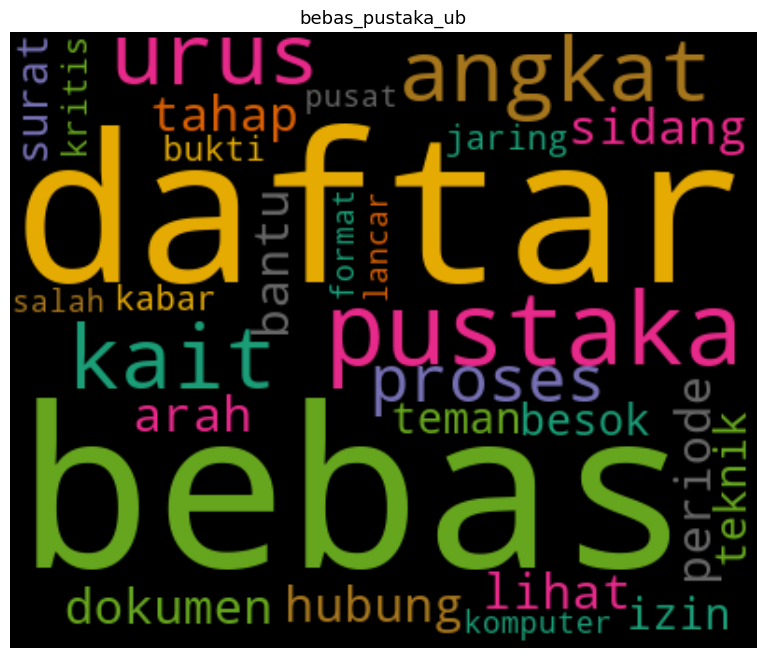

nama      1
sap       1
izin      1
bebas     1
contoh    1
         ..
ilmiah    0
ilmu      0
imam      0
iman      0
zip       0
Name: bebas_tanggungan_laboratorium_filkom_ub, Length: 592, dtype: int64


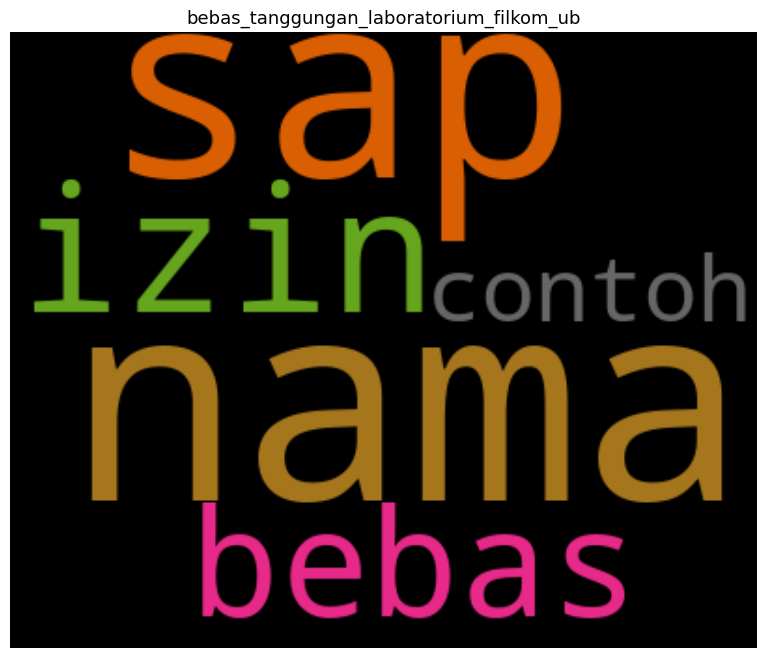

kena      2
izin      2
lihat     2
surat     2
abar      0
         ..
ijazah    0
ikan      0
ilmiah    0
ilmu      0
zip       0
Name: cara_daftar_bantuan_kemendikbud_ristek, Length: 592, dtype: int64


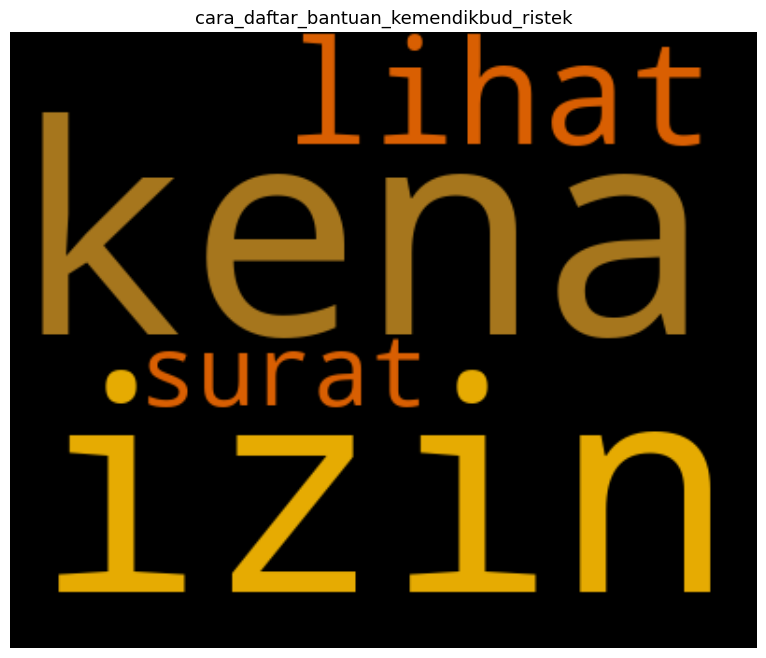

ukt           52
bayar         43
uang          17
siam          12
bantu         12
              ..
interaktif     0
insyaallah     0
insan          0
inggris        0
zip            0
Name: cek_siam_untuk_tagihan, Length: 592, dtype: int64


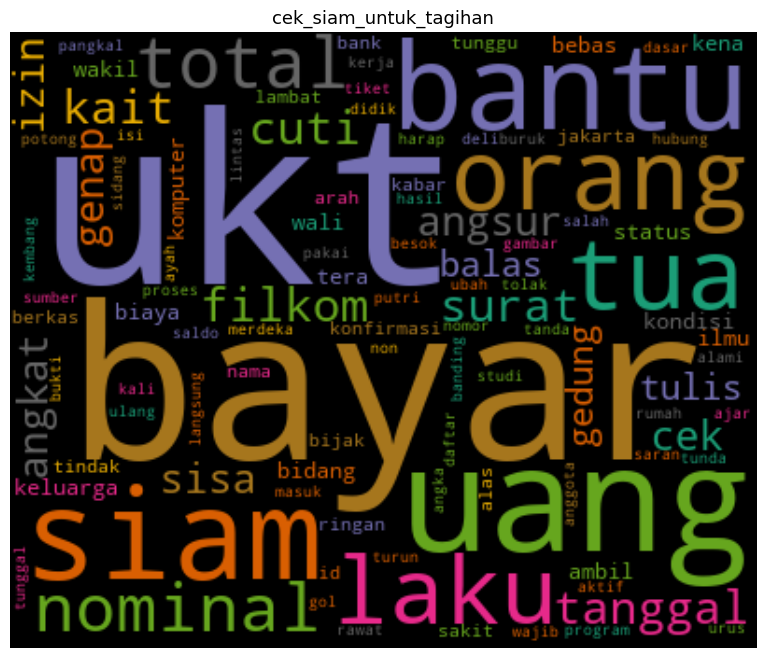

daftar           42
ulang            34
bayar            31
ukt              25
bantu            13
                 ..
insyaallah        0
insan             0
inggris           0
infrastruktur     0
zip               0
Name: daftar_ulang, Length: 592, dtype: int64


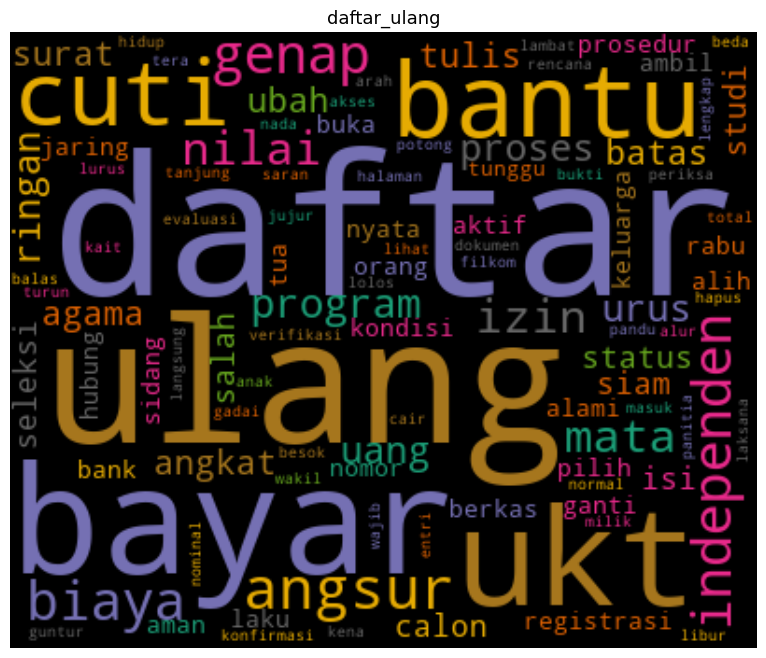

uji              40
ukt              19
daftar           12
bebas            10
bantu             9
                 ..
inggris           0
infrastruktur     0
industri          0
induk             0
zip               0
Name: dosen_pembimbing_ujian_skripsi_tidak_hadir_salah_satu, Length: 592, dtype: int64


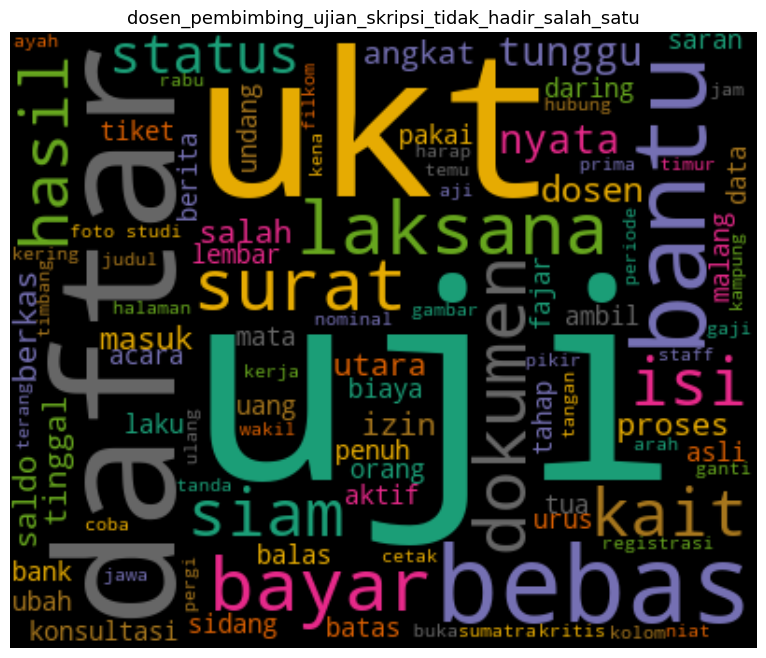

uji              44
ukt              33
bayar            21
bantu            18
dosen            12
                 ..
inti              0
internasional     0
interaktif        0
insyaallah        0
zip               0
Name: form_pasca_ujian_skripsi, Length: 592, dtype: int64


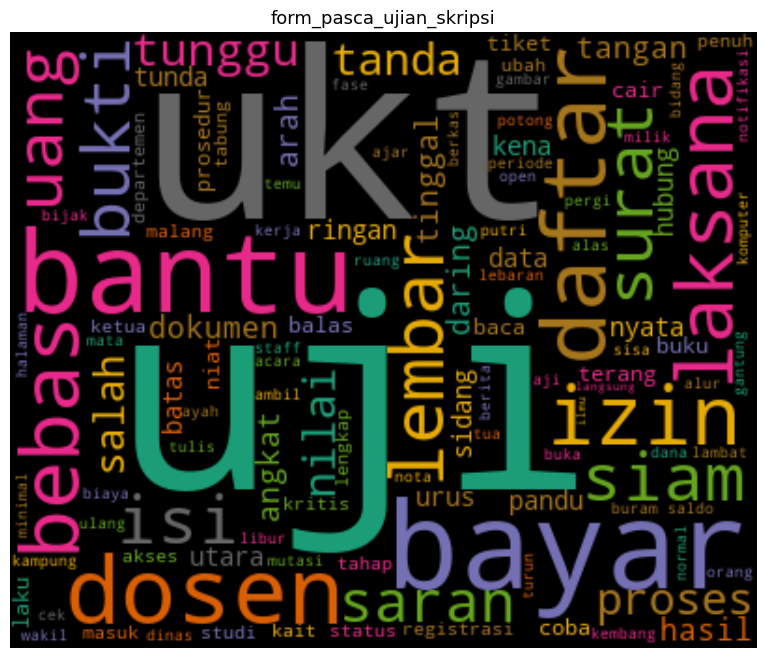

foto          13
verifikasi     4
format         2
warna          2
daftar         2
              ..
iman           0
indeks         0
independen     0
indra          0
zip            0
Name: foto_yudisium, Length: 592, dtype: int64


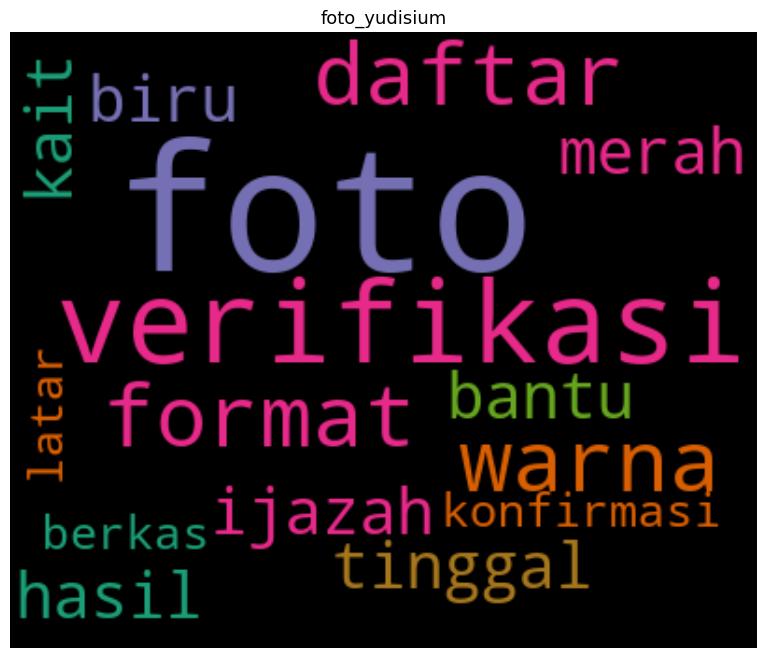

bayar         25
ukt           23
bantu         16
angsur        11
hubung         9
              ..
indra          0
independen     0
indeks         0
iman           0
zip            0
Name: foto_yudisium_sc218, Length: 592, dtype: int64


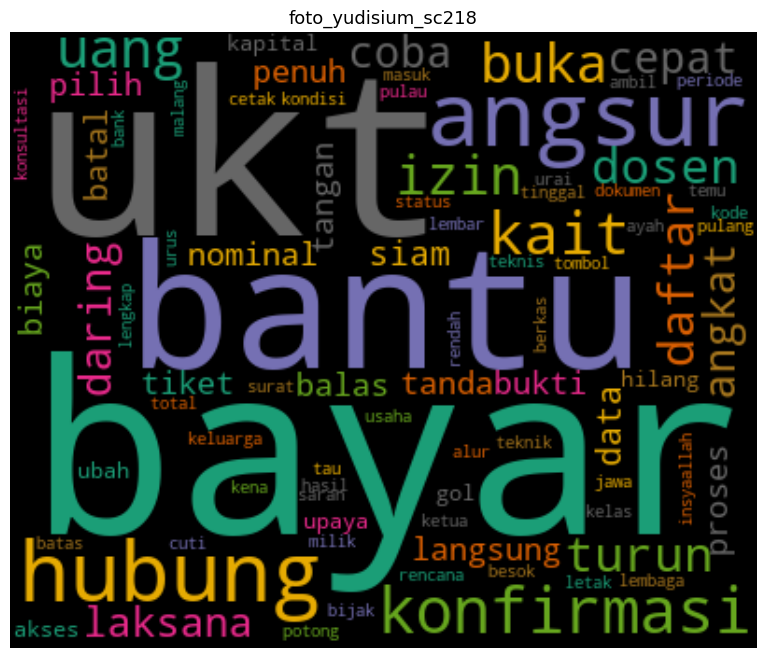

bayar         8
target        6
tunggu        4
status        4
dosen         4
             ..
independen    0
indra         0
induk         0
industri      0
zip           0
Name: ijazah, Length: 592, dtype: int64


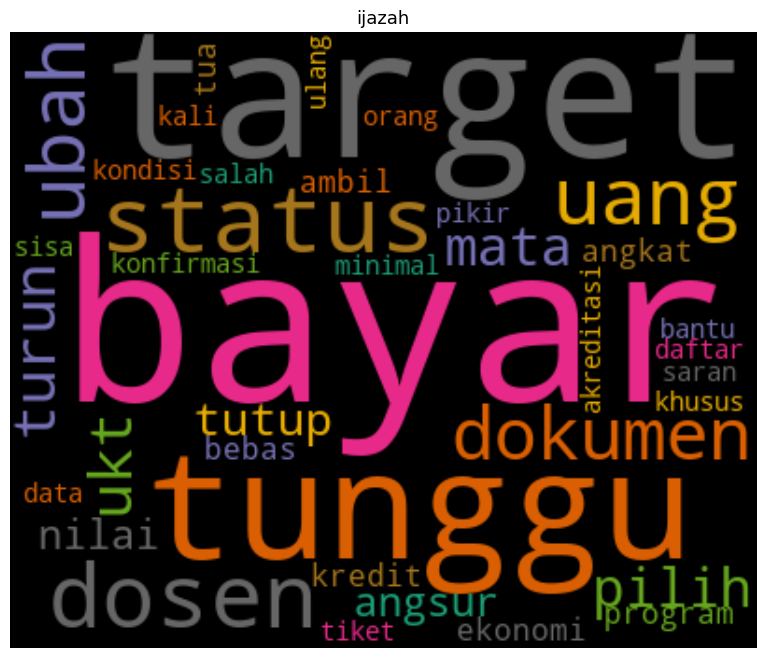

daftar        8
tahap         4
bantu         4
data          4
pilih         4
             ..
imam          0
iman          0
indeks        0
independen    0
zip           0
Name: jadwal_bantuan, Length: 592, dtype: int64


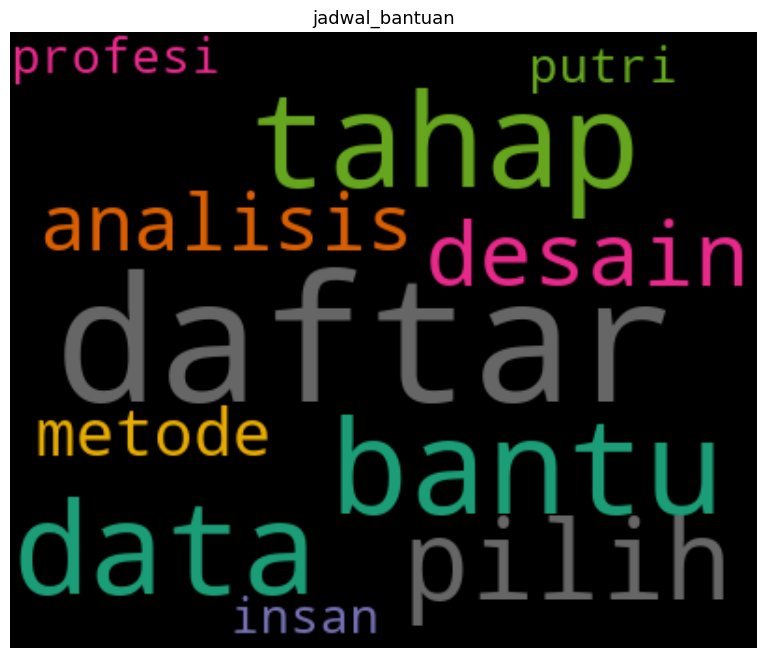

ukt           10
bayar         10
nilai          9
daftar         8
jalur          5
              ..
independen     0
indeks         0
iman           0
imam           0
zip            0
Name: kip_k, Length: 592, dtype: int64


KeyboardInterrupt: 

In [31]:
# Importing wordcloud for plotting word clouds and textwrap for wrapping longer text
from wordcloud import WordCloud
from textwrap import wrap
import matplotlib.pyplot as plt

# Function for generating word clouds
def generate_wordcloud(data,title):
    wc = WordCloud(width=400, height=330, max_words=150,colormap="Dark2").generate_from_frequencies(data)
    plt.figure(figsize=(10,8))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.title('\n'.join(wrap(title,60)),fontsize=13)
    plt.show()
    
# Transposing document term matrix
df_dtm = df_dtm.transpose()

# Plotting word cloud for each product
for index,product in enumerate(df_dtm.columns):
    print(df_dtm[product].sort_values(ascending=False))
    generate_wordcloud(df_dtm[product].sort_values(ascending=False),product)